# ACF of AR Model

In [34]:
import numpy as np
from numpy.random import default_rng
import numpy.linalg as lin
import scipy.signal as sig
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stools
import statsmodels.tsa.arima_process as arima
plt.rcParams["figure.figsize"] = (8,5)
rng = default_rng()

## AR(1) Model

Create a random signal (white Gaussian noise) and filter it with a auto-regressive filter.

$$
y[n] = a_1 y[n-1] + u[n]
$$

First we plot a short signal for demonstration. Be careful, scipy's filter function has the following convention `a[0]*y[n] = b[0]*x[n] - a[1]*y[n-1] - ... - a[N]*y[n-N]`


In [22]:
u = rng.standard_normal(30)

<StemContainer object of 3 artists>

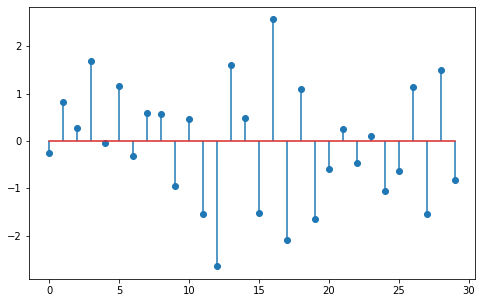

In [23]:
a = [1, 0.6] # a[1] here is $-a_1$ in the equation above
b = [1]

y = sig.lfilter(b,a,u)
plt.stem(y)

Next, we calculate the ACF from the analytic result and compare it with an estimated ACF. To obtain a good estimation, we use a long signal & estimate the ACF from it.

In [26]:
# analytic expression for ACF
n = np.linspace(0,10,11)
acf_analytic = (-a[1])**n

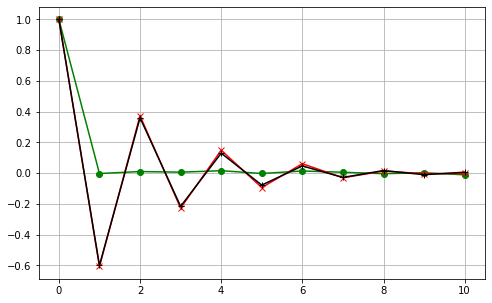

In [27]:
# estimation
u = rng.standard_normal(10000)
yma = sig.lfilter(b,a,u)

acf_u = stools.acf(u, nlags=10, fft=False)
acf_x = stools.acf(yma, nlags=10, fft=False)

plt.plot(acf_u, '-go', acf_x, '-rx', acf_analytic, '-k+')
plt.grid()

And finally, we claculate the ACF using Python `statsmodels`; I assume this uses the Yule-Walker equations to calcluate the ACF.

In [13]:
arima.arma_acf(a, b, lags=7)

array([ 1.      , -0.6     ,  0.36    , -0.216   ,  0.1296  , -0.07776 ,
        0.046656])

For comparison, we print the esimtated ACF `acf_x` and the analytic version `acf_analytic`.

In [14]:
acf_x

array([ 1.        , -0.60312073,  0.3588347 , -0.21648577,  0.13360051,
       -0.07431637,  0.04571506, -0.02701169,  0.01641998, -0.00661504,
       -0.01585251])

In [15]:
acf_analytic

array([ 1.        , -0.6       ,  0.36      , -0.216     ,  0.1296    ,
       -0.07776   ,  0.046656  , -0.0279936 ,  0.01679616, -0.0100777 ,
        0.00604662])

## AR(2) Model

The signal looks like this

In [101]:
u = rng.standard_normal(30)

<StemContainer object of 3 artists>

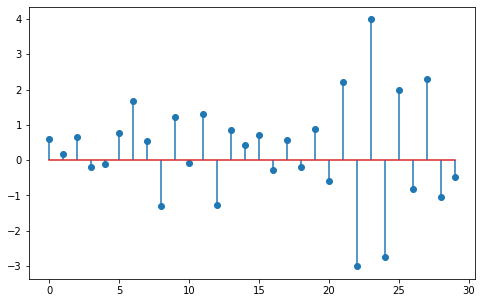

In [102]:
a = [1.5, 0.6, -0.4]
b = [1.5]

y = sig.lfilter(b,a,u)
plt.stem(y)

For the analytical solution, we need to divide the coefficients by `a[0]`.

In [103]:
a1 = -a[1]/a[0]
a2 = -a[2]/a[0]

Then we set up the coefficient matrix for the Yule-Walk equations and obtain the ACF for the first 3 lags.

In [128]:
a_mtx = np.array([[1, -a1, -a2], [-a1, (1-a2), 0], [-a2, -a1, 1]])
b_vec = np.array([1, 0, 0])
acf_analytic_start = lin.solve(a_mtx, b_vec)
acf_analytic_start = acf_analytic_start / acf_analytic_start[0]

The ACF at higher lags can be obtained from the already calculated ones.

In [124]:
acf_analytic = np.zeros(20)
acf_analytic[0:3] = acf_analytic_start[0:3]

for n in range(3,20):
        acf_analytic[n] = a1 * acf_analytic[n-1] + a2 * acf_analytic[n-2]
acf_analytic

array([ 1.        , -0.54545455,  0.48484848, -0.33939394,  0.26505051,
       -0.19652525,  0.14929024, -0.11212283,  0.08465986, -0.06376337,
        0.04808131, -0.03623609,  0.02731612, -0.0205894 ,  0.01552006,
       -0.01169853,  0.0088181 , -0.00664685,  0.00501023, -0.00377658])

In [126]:
# estimation
u = rng.standard_normal(10000)
yma = sig.lfilter(b,a,u)

acf_x = stools.acf(yma, nlags=15, fft=False)

acf_x

array([ 1.        , -0.53149176,  0.4696622 , -0.32578831,  0.25298947,
       -0.1976573 ,  0.15173507, -0.11484212,  0.08852104, -0.06122619,
        0.03615556, -0.02187197,  0.01236388, -0.00555727,  0.00237846,
        0.01315226])

Plot a comparison between estimated and analytic solution

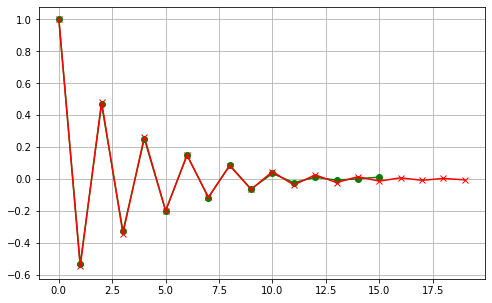

In [127]:
plt.plot(acf_x, '-go', acf_analytic, '-rx')
plt.grid()